In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift

import matplotlib
matplotlib.rcParams['figure.figsize'] = 10, 8

In [2]:
def apply_mean_shift(img, with_edges):
    n, m = img.shape[:2]

    if with_edges: edges = cv2.Canny(img, threshold1=10, threshold2=70)

    features = np.zeros((n * m, 5), np.uint8)
    for i in range(n):
        for j in range(m):
            features[i * m + j] = (i, j, img[i, j, 0] / 2, img[i, j, 1] / 2, img[i, j, 2] / 2)
            if (with_edges and edges[i, j]): features[i * m + j] = (0, 0, 255, 255, 255)

    MS = MeanShift(bandwidth=17, bin_seeding=True)
    MS.fit(features)
    labels = MS.labels_

    cluster_label = np.zeros((n, m), np.uint8)
    unique_labels = np.unique(labels)
    sums = np.zeros((len(unique_labels), 3), np.float32)
    how_many = np.zeros((len(unique_labels)), np.float32)
    color = np.zeros((len(unique_labels), 3), np.uint8)

    for i in range(n):
        for j in range(m):
            cur_label = labels[i * m + j]
            cluster_label[i, j] = cur_label
            sums[cur_label, 0] += img[i, j, 0]
            sums[cur_label, 1] += img[i, j, 1]
            sums[cur_label, 2] += img[i, j, 2]
            how_many[cur_label] += 1

    for i in range(len(color)):
        if (how_many[i] < 1): continue
        sums[i] //= how_many[i]
        color[i] = sums[i]

    clusters = np.zeros((n, m, 3), np.uint8)
    for i in range(n):
        for j in range(m):
            if (with_edges and edges[i, j]): clusters[i, j] = (255, 255, 255)
            else: clusters[i, j] = color[cluster_label[i, j]]

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(clusters, cv2.COLOR_BGR2RGB))
    plt.show()

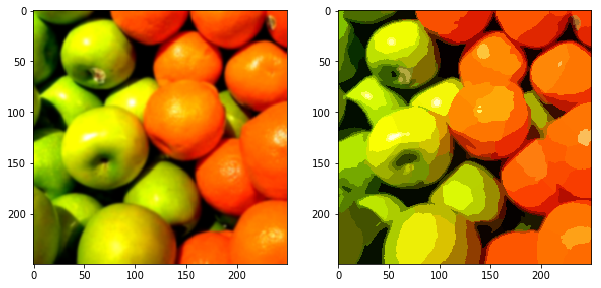

In [3]:
image = cv2.imread("../resources/apples_oranges.png")

ratio = 250.0 / image.shape[1]
rows, cols = 250, int(ratio * image.shape[0])

image = cv2.resize(image, (rows, cols), interpolation=cv2.INTER_AREA)
image = cv2.GaussianBlur(image, (7, 7), 1)

apply_mean_shift(image, False)